# Open Food Facts

In [1]:
import numpy as np
import matplotlib
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

data = pandas.read_csv("/home/clebson/Documents/datasets/OpenFoodFacts/en.openfoodfacts.org.products.csv", sep="\t")

/home/clebson/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/clebson/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (0,3,5,27,36,116,121,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Let's see the most popular countries in this dataset
I'm considering the most popular country as the country that contributed the most with the data. First, let's filter the data:
* The attributes that identifies the countries are: countries (text), countries_tags (text) and countries_en (text). However, the attributes countries and countries_tags are prone to lead to errors, since most of the tuples are undefined. Therefore, I choose to maintain only the tuples with the attribute countries_en, since only 223 doesn't have this attribute. Thus, only tuples in which the countrie_en attribute were not None was maintained.
* As we can observe in the histogram bellow, the country that contributted the most was France, with almost 60% of the whole data collection.

In [2]:
def build_dictionary(data, attribute):
    dictionary = dict()
    for value in data[attribute]:
        if(value in dictionary):
            dictionary[value] +=  1
        else:
            dictionary[value] = 1
    return dictionary

def sort_dictionary(dictionary, reverse_=False):
    return sorted(dictionary.items(), key=lambda x: x[1], reverse=reverse_)


data = data[data['countries_en'].notnull()]

famous_countries = build_dictionary(data, 'countries_en')
famous_countries = sort_dictionary(famous_countries, True)
famous_countries = pandas.DataFrame(famous_countries, columns=['Country', 'Contribution'])

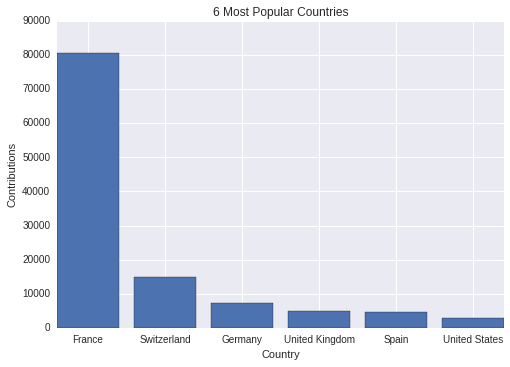

In [3]:
plt.xticks(range(6), famous_countries['Country'][0:6])
plt.bar(range(6), famous_countries['Contribution'][0:6], align="center")
plt.title("6 Most Popular Countries")
plt.ylabel("Contributions")
plt.xlabel("Country")

# The most popular product in each Country
* Now let's see what are the most popular product for the 6 first countries.

In [4]:
france = data[data['countries_en'] == 'France']
switzerland = data[data['countries_en'] == 'Switzerland']
germany = data[data['countries_en'] == 'Germany']
united_kingdom = data[data['countries_en'] == 'United Kingdom']
spain = data[data['countries_en'] == 'Spain']
usa = data[data['countries_en'] == 'United States']

france_product = build_dictionary(france, 'product_name')
afrance = np.asarray(sort_dictionary(france_product, True))[1:10,:]

switzerland_product = build_dictionary(switzerland, 'product_name')
aswitzerland = np.asarray(sort_dictionary(switzerland_product, True))[1:10,:]

germany_product = build_dictionary(germany, 'product_name')
agermany = np.asarray(sort_dictionary(germany_product, True))[1:10,:]

united_kingdom_product = build_dictionary(united_kingdom, 'product_name')
auk = np.asarray(sort_dictionary(united_kingdom_product, True))[1:10,:]

spain_product = build_dictionary(spain, 'product_name')
aspain = np.asarray(sort_dictionary(spain_product, True))[1:10,:]

usa_product = build_dictionary(usa, 'product_name')
ausa = np.asarray(sort_dictionary(usa_product, True))[1:10, :]

# Remove special characters.
def removeSpecialCharacters(data):
    for i in xrange(len(data)):
        data[i][0] = data[i][0].replace("&quot", "").replace("\xc3", "").replace("\xa1n", "").replace("\xb3", "")
        data[i][0] = data[i][0].replace("\xad", "").replace("\xa9", "").replace(" ;", "; ");
    return data

afrance = removeSpecialCharacters(afrance)
aswitzerland = removeSpecialCharacters(aswitzerland)
agermany = removeSpecialCharacters(agermany)
auk = removeSpecialCharacters(auk)
aspain = removeSpecialCharacters(aspain)
ausa = removeSpecialCharacters(ausa)

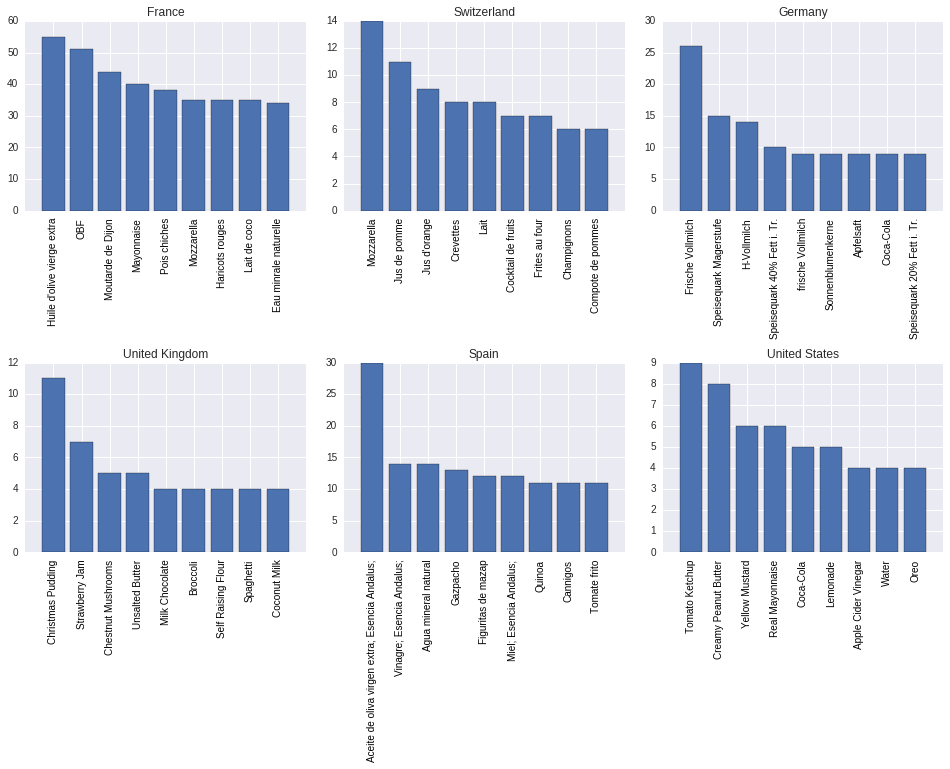

In [5]:
f, axarr = plt.subplots(nrows=2, ncols=3)
def plot_bar_chart(line, col, array, name):
    axarr[line][col].bar(range(len(array[:,1])), array[:,1], align="center")
    plt.sca(axarr[line][col])
    plt.xticks(range(len(array[:,1])), array[:, 0], color='black', rotation='vertical')
    axarr[line][col].set_title(name)

plot_bar_chart(0, 0, afrance, "France")
plot_bar_chart(0, 1, aswitzerland, "Switzerland")
plot_bar_chart(0, 2, agermany, "Germany")
plot_bar_chart(1, 0, auk, "United Kingdom")
plot_bar_chart(1, 1, aspain, "Spain")
plot_bar_chart(1, 2, ausa, "United States")
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)

### Looking at the individual products for each country in the chart above, we can verify that the 5 most important products in the data collection for the countries are:
* Frace
    * Olive Oil
    * OBF: All sorts of products for skin
    * Moustard
    * Mayonnaise
    * Pois chiches
* Switzerland
    * Mozzarella
    * Jus de pomme
    * Jus d'orange
    * Crevettes
    * Lait
* Germany
    * Frische Vollmilch
    * Speisequark Magerstufe
    * H-Vollmilch
    * Speisequark 40% Fett i. Tr.
    * frische Vollmilch'
* UK
    * Christmas Pudding
    * Strawberry Jam
    * Chestnut Mushrooms
    * Unsalted Butter
    * Milk Chocolate
* Spain
    * Aceite de oliva virgen extra
    * Esencia Andalus;
    * Vinagre; Esencia Andalus;
    * Agua mineral natural
    * Gazpacho
    * Figuritas de mazap'
* USA
    * Tomato Ketchup
    * Creamy Peanut Butter
    * Yellow Mustard
    * Real Mayonnaise
    * Coca Cola

### As we can observe, the second most popular product OBF for the country France is not Food Related. As we can see in the images retrieved from the urls in the dataset, all of them are skin related products.

http://en.openfoodfacts.org/images/products/200/000/000/6642/front.5.400.jpg


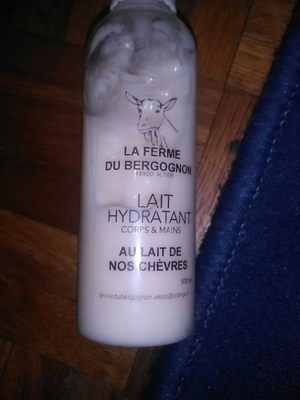

http://en.openfoodfacts.org/images/products/20277246/front.3.400.jpg


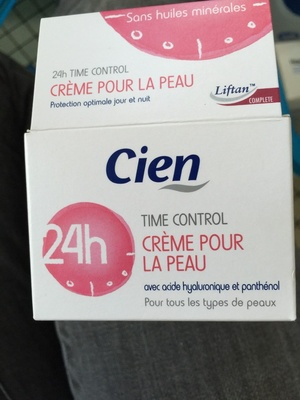

http://en.openfoodfacts.org/images/products/20456887/front.3.400.jpg


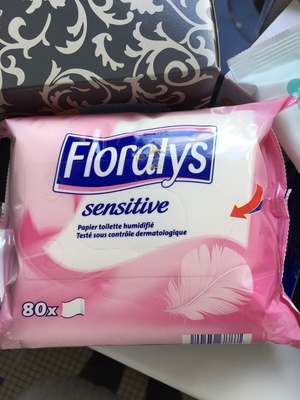

In [8]:
from IPython.display import display, Image

not_food = [x for x in france[france['product_name']=="OBF"]["image_url"][0:3]]
for path in not_food:
    print path
    img = Image(path)
    display(img)

#### Since the second most popular item for France is not food related, let's remove this product from the dataset.

In [9]:
france = france[france['product_name'] != "OBF"]

## Now Let's see what are the most used food additives named in english for the first 6 most popular countries.

In [10]:
def split_and_build_dictionary(data, column_name, rule):
    """ Split each line of the dataframe in the given column according to a symbol to split the string"""
    additives = {}
    for idx in data.index:
        splits = data[column_name][idx].split(rule)
        for s in splits:
            if s in additives:
                additives[s] += 1;
            else:
                additives[s] = 1
    return additives

def get_nparray(data, column_name, split=','):
    """
    Transform a collumn of the dataframe in a numpy array. Each line of the original dataframe is divided
    according to a splitting rule criteria. The default is to split considering the comma operator.
    """
    additives = data[data[column_name].notnull()]
    additives = split_and_build_dictionary(additives, column_name, split)
    additives = np.array(sort_dictionary(additives, True))
    return additives
    
fran_additives = get_nparray(france, "additives_en")
switz_additives = get_nparray(switzerland, "additives_en")
germany_additives = get_nparray(germany, "additives_en")
usa_additives = get_nparray(usa, "additives_en")
uka_additives = get_nparray(united_kingdom, "additives_en")
spain_additives = get_nparray(spain, "additives_en")


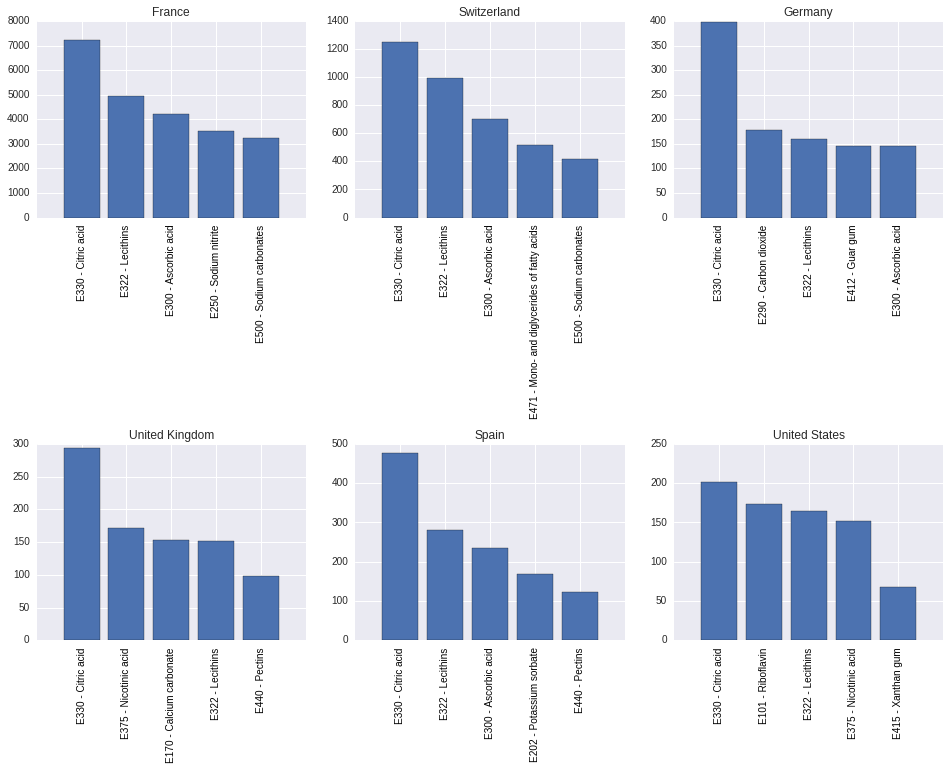

In [11]:
f, axarr = plt.subplots(nrows=2, ncols=3)
plot_bar_chart(0, 0, fran_additives[0:5], name='France')
plot_bar_chart(0, 1, switz_additives[0:5], name='Switzerland')
plot_bar_chart(0, 2, germany_additives[0:5], name='Germany')
plot_bar_chart(1, 0, uka_additives[0:5], name='United Kingdom')
plot_bar_chart(1, 1, spain_additives[0:5], name='Spain')
plot_bar_chart(1, 2, usa_additives[0:5], name='United States')
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)

As we can observe in this last plot, the most common additive in all of the 6 countries is Citric acid. According to the UK Food Guide, citric acid is normally manufactured by fermentation of cane sugar, pineapple and low-grade lemons.
Since sugar is perharps the most common way to produce Citric acid, let's see the amount of sugar per country.

### Sugar per 100g of food
The mean of the amount of sugar in each 100g of food in each country tell us that United States is the leading country in the use of Sugar, with an average of 25g of sugar in each 100g. This is followed by United Kingdom (16g), Switzerland (15g), France (15g), Germany (13g) and Spain (12g).

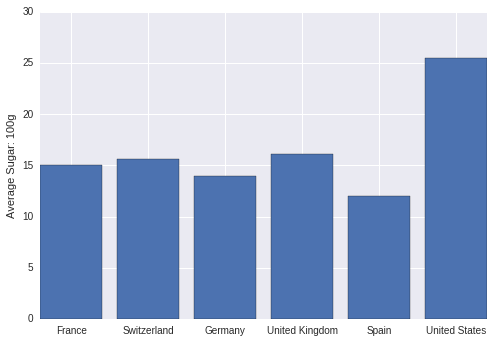

In [22]:
france_sugar = france[france["sugars_100g"].notnull()]
switz_sugar = switzerland[switzerland['sugars_100g'].notnull()]
germany_sugar = germany[germany['sugars_100g'].notnull()]
uk_sugar = united_kingdom[united_kingdom['sugars_100g'].notnull()]
spain_sugar = spain[spain['sugars_100g'].notnull()]
usa_sugar = usa[usa['sugars_100g'].notnull()]

sugar_per_country = pandas.DataFrame([france_sugar.sugars_100g.mean(), 
                      switz_sugar.sugars_100g.mean(), 
                      germany_sugar.sugars_100g.mean(),
                      uk_sugar.sugars_100g.mean(),
                      spain_sugar.sugars_100g.mean(),
                      usa_sugar.sugars_100g.mean()], 
                      index=['France', 'Switzerland', 'Germany', 'United Kingdom', 'Spain', 'United States'], 
                      columns=['avg_sugar']
                    )
plt.xticks(range(6), sugar_per_country.index)
plt.bar(range(6), sugar_per_country['avg_sugar'], align='center')
plt.ylabel("Average Sugar: 100g")

### Let's take a Look at the 5 first products that contribute the most with sugar for the Country USA.

In [17]:
sugImg = usa[usa["sugars_100g"].notnull()].sort_values('sugars_100g')[:-6:-1][["product_name", "image_url"]].values

Classic Cheddar Pierogies 


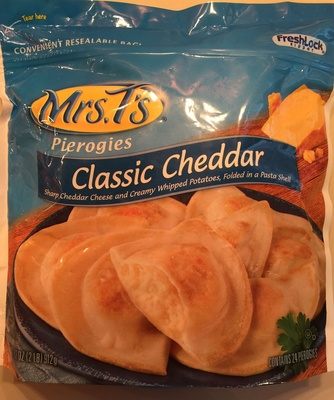

Organic Raw Kombucha Original


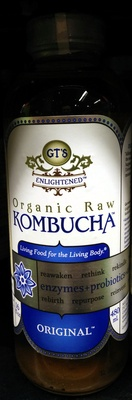

Apple Cider


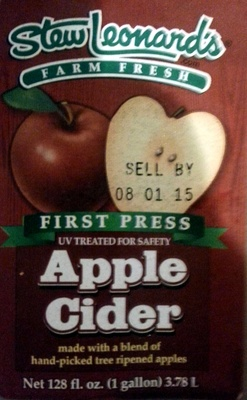

Souper shapes Shaped Pasta with Chicken in Chicken Broth


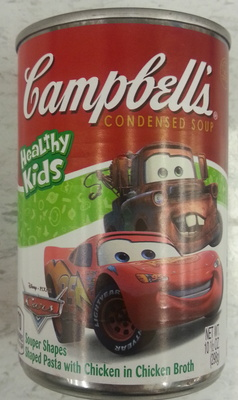

Cream of Chicken


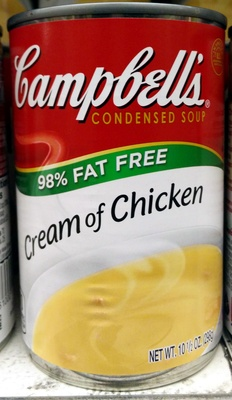

In [18]:
from IPython.display import display, Image
for path in sugImg:
    print path[0]
    img = Image(path[1])
    display(img)

### What about the amount of salt?

In [137]:
france_salt = france[france["salt_100g"].notnull()]
switz_salt = switzerland[switzerland['salt_100g'].notnull()]
germany_salt = germany[germany['salt_100g'].notnull()]
uk_salt = united_kingdom[united_kingdom['salt_100g'].notnull()]
spain_salt = spain[spain['salt_100g'].notnull()]
usa_salt = usa[usa['salt_100g'].notnull()]

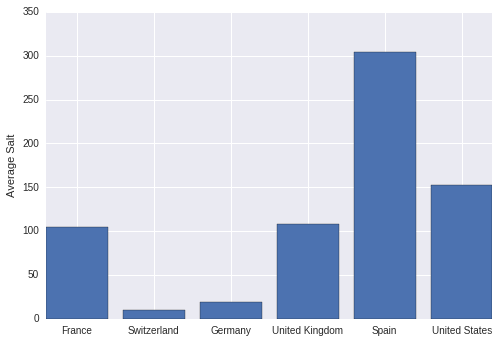

In [138]:
def transform_to_float(string):
    string = str(string)
    string = string.replace(",", ".")
    string = float(string)
    return string

france_salt = france_salt['salt_100g'].apply(transform_to_float)
switz_salt = switz_salt['salt_100g'].apply(transform_to_float)
germany_salt = germany_salt['salt_100g'].apply(transform_to_float)
uk_salt = uk_salt['salt_100g'].apply(transform_to_float)
spain_salt = spain_salt['salt_100g'].apply(transform_to_float)
usa_salt = usa_salt['salt_100g'].apply(transform_to_float)
salt_per_country = pandas.DataFrame([france_salt.mean(), 
                      switz_salt.mean(), 
                      germany_salt.mean(),
                      uk_salt.mean(),
                      spain_salt.mean(),
                      usa_salt.mean()], 
                      index=['France', 'Switzerland', 'Germany', 'United Kingdom', 'Spain', 'United States'], 
                      columns=['avg_salt']
                    )
plt.xticks(range(6), salt_per_country.index)
plt.bar(range(6), salt_per_country['avg_salt'], align='center')
plt.ylabel("Average Salt")

Regarding the amount of salt in their food, Spain is the lead with in the consumption of salt with an average of 300g of salt consumption. The United States is the second (152g), United Kingdom third (108), France the fourth (104). Germany the fith (19g) and Switzerland the six.

In [225]:
saltImg = spain[spain["salt_100g"].notnull()].sort_values('salt_100g')[:-6:-1][["product_name", "image_url"]]

In [243]:
def remove_special_characters_string(string):
    string = string.replace("&quot", "").replace(" ;", "; ")
    return string
    
saltImg['product_name'] = saltImg['product_name'].apply(remove_special_characters_string)

Queso rallado


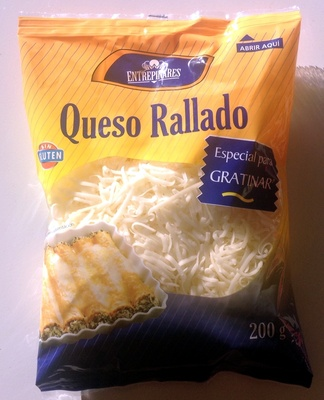

Algas wakame deshidratadas


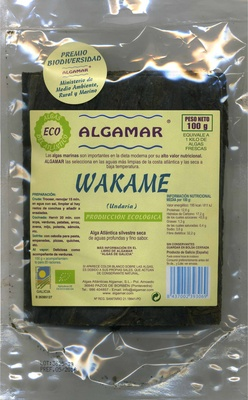

Tomate frito; Diamir;


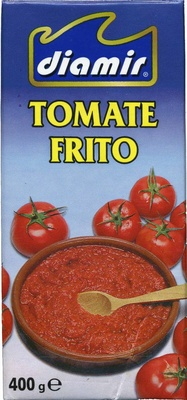

Paté vegetal ecológico; Soria Natural; con champiñones


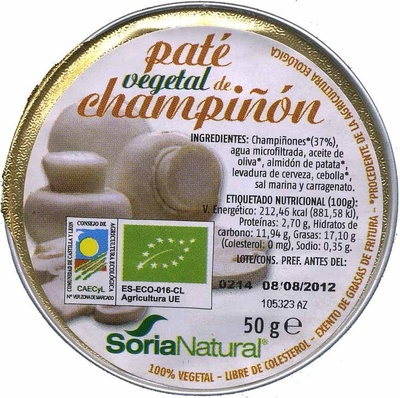

Galletas María sin gluten


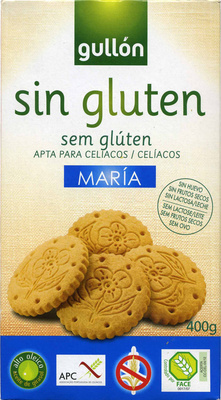

In [250]:
for path in saltImg.values:
    print path[0]
    img = Image(path[1])
    display(img)

### A small Summary of the evaluation

* France is the country that contributed the most in this dataset
* The second most popular item in the database for the country france is not food related, in fact it is a skin product
* The most popular products in each country are:
    * Olive Oil (France and Spain)
    * Mozzarella (Switzerland)
    * Frische Vollmilch (Germany)
    * Christmas Pudding (United Kingdom)
    * Tomato Ketchup (USA)
* Citrict Acid labeled E330 is the most popular food in all countries
* United States of America holds the higher percentage of food consumption amongst the 6 most popular contries
* Spain is the country that holds the higher percentage of Salt products.